In [31]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [9]:
if os.path.exists('brain_stroke.csv'):
    print("Alreday Present")
else:
    !wget https://www.dropbox.com/s/fpymf1avgdhx31i/brain_stroke.csv

Alreday Present


In [8]:
df=pd.read_csv('brain_stroke.csv')

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [11]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [22]:
for col in df.columns:
    print("column:  {:18s} |    unique element cnt: {}".format(col, len(np.unique(df[col]))))

column:  gender             |    unique element cnt: 2
column:  age                |    unique element cnt: 104
column:  hypertension       |    unique element cnt: 2
column:  heart_disease      |    unique element cnt: 2
column:  ever_married       |    unique element cnt: 2
column:  work_type          |    unique element cnt: 4
column:  Residence_type     |    unique element cnt: 2
column:  avg_glucose_level  |    unique element cnt: 3895
column:  bmi                |    unique element cnt: 342
column:  smoking_status     |    unique element cnt: 4
column:  stroke             |    unique element cnt: 2


In [14]:
col_to_encode=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for i in col_to_encode:
    encoder=LabelEncoder()
    df[i]=encoder.fit_transform(df[i])
    print(f"{i} encoding: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")

gender encoding: {'Female': 0, 'Male': 1}
ever_married encoding: {'No': 0, 'Yes': 1}
work_type encoding: {'Govt_job': 0, 'Private': 1, 'Self-employed': 2, 'children': 3}
Residence_type encoding: {'Rural': 0, 'Urban': 1}
smoking_status encoding: {'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [23]:
#Scalling the dataset
scaler = MinMaxScaler()
for col in df.columns:
    if(col!='stroke'):
        df[col] = scaler.fit_transform(np.array(df[col]).reshape(len(df[col]),1))

In [24]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,0.529051,0.096165,0.055210,0.658502,0.434116,0.508332,0.234621,0.415420,0.459814,0.049789
std,0.493008,0.276645,0.294848,0.228412,0.474260,0.286723,0.499981,0.208085,0.194569,0.357393,0.217531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.333333,0.000000,0.102068,0.277937,0.000000,0.000000
50%,0.000000,0.548340,0.000000,0.000000,1.000000,0.333333,1.000000,0.169560,0.404011,0.666667,0.000000
75%,1.000000,0.743652,0.000000,0.000000,1.000000,0.666667,1.000000,0.271166,0.532951,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


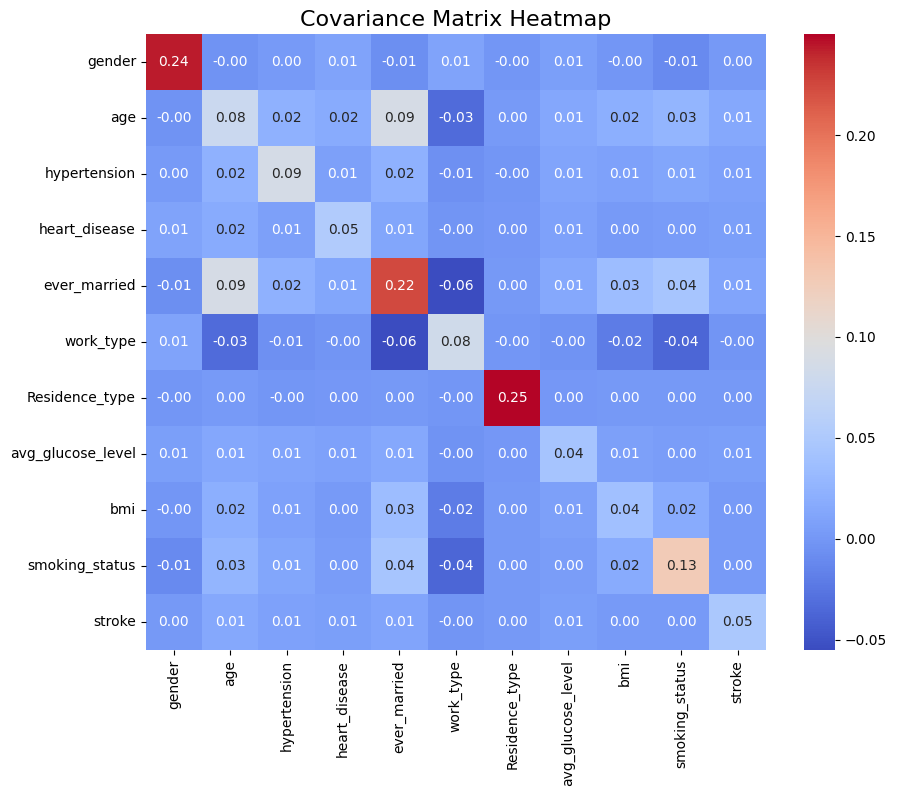

In [30]:
cov_matrix=df.cov()
plt.figure(figsize=(10, 8)) 
sns.heatmap(cov_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Covariance Matrix Heatmap', fontsize=16)

# Show plot
plt.show()

In [46]:
#98% variance explained

pca = PCA(n_components=0.98)
pca.fit(df)

# Get principal components
pcs = pca.transform(df)
pc_df = pd.DataFrame(pcs, columns=['PC{}'.format(i) for i in range(1, pca.n_components_+1)])

# Get explained variance ratios
variance_ratios = pca.explained_variance_ratio_